In [1]:

# prompt: kaggle datasets download -d ohagwucollinspatrick/ghana-crop-disease

!kaggle datasets download -d ohagwucollinspatrick/ghana-crop-disease

Dataset URL: https://www.kaggle.com/datasets/ohagwucollinspatrick/ghana-crop-disease
License(s): Attribution 4.0 International (CC BY 4.0)
100% 10.4G/10.4G [01:36<00:00, 140MB/s]
100% 10.4G/10.4G [01:36<00:00, 116MB/s]


In [2]:
!unzip ghana-crop-disease.zip -d data


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: data/images/id_axfwao.jpg  
  inflating: data/images/id_axjera.jpg  
  inflating: data/images/id_axktj2.jpg  
  inflating: data/images/id_axojpi.jpg  
  inflating: data/images/id_ay7lil.jpg  
  inflating: data/images/id_ay85js.jpg  
  inflating: data/images/id_ayd2my.jpg  
  inflating: data/images/id_ayeiia.jpg  
  inflating: data/images/id_ayklsb.jpg  
  inflating: data/images/id_azbboc.jpg  
  inflating: data/images/id_azkhqh.jpg  
  inflating: data/images/id_azriv5.jpg  
  inflating: data/images/id_azzp7g.jpg  
  inflating: data/images/id_b11ovu.jpg  
  inflating: data/images/id_b15b2l.jpg  
  inflating: data/images/id_b1awql.jpg  
  inflating: data/images/id_b1e9sg.jpg  
  inflating: data/images/id_b1mlcd.jpg  
  inflating: data/images/id_b1sv9d.jpg  
  inflating: data/images/id_b2do8m.jpg  
  inflating: data/images/id_b2e92m.jpg  
  inflating: data/images/id_b2jdbn.jpg  
  inflating: data/im

In [8]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load train and test files
train = pd.read_csv('/content/data/Train.csv')
test = pd.read_csv('/content/data/Test.csv')


# Afficher les premières lignes du fichier d'entraînement
print("Train Data:")
print(train.head())

# Afficher les premières lignes du fichier de test
print("\nTest Data:")
print(test.head())

# Afficher les informations sur les colonnes
print("\nTrain Data Info:")
print(train.info())

Train Data:
        Image_ID  confidence                  class         ymin        xmin  \
0  id_11543h.jpg         1.0  Pepper_Bacterial_Spot   194.649671  328.803454   
1  id_11543h.jpg         1.0  Pepper_Bacterial_Spot   149.632401  256.768914   
2  id_11543h.jpg         1.0  Pepper_Bacterial_Spot   234.046875  327.138158   
3  id_11543h.jpg         1.0  Pepper_Bacterial_Spot   221.277138  340.411184   
4  id_11ee1c.jpg         1.0        Pepper_Fusarium  2000.563598  989.588908   

          ymax         xmax  
0   208.107730   341.967928  
1   162.910362   266.195724  
2   252.712993   338.876645  
3   238.593750   354.651316  
4  2184.252196  1401.748952  

Test Data:
        Image_ID  confidence  class  ymin  xmin  ymax  xmax
0  id_128pxx.jpg         NaN    NaN   NaN   NaN   NaN   NaN
1  id_12jbci.jpg         NaN    NaN   NaN   NaN   NaN   NaN
2  id_143s4o.jpg         NaN    NaN   NaN   NaN   NaN   NaN
3  id_14tfmb.jpg         NaN    NaN   NaN   NaN   NaN   NaN
4  id_14tw4o.jp

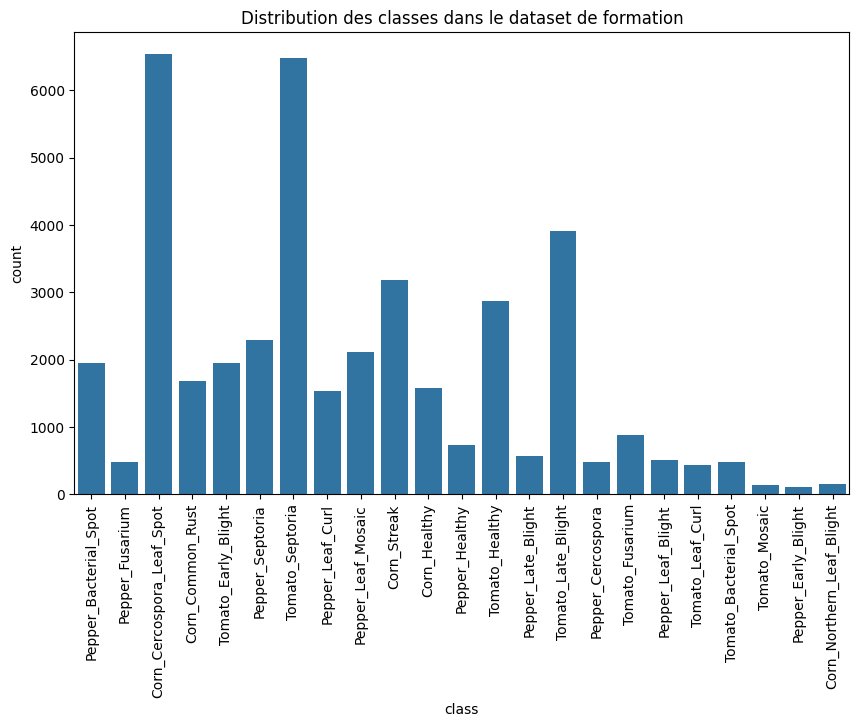

In [9]:


# Charger les données
#train = pd.read_csv('/content/Train.csv')

# Visualiser la distribution des classes
plt.figure(figsize=(10,6))
sns.countplot(x='class', data=train)
plt.title('Distribution des classes dans le dataset de formation')
plt.xticks(rotation=90)
plt.show()

# Analyser les dimensions des images (si disponibles)
train['image_path'] = '/content/images/' + train['Image_ID']

In [10]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler


# Identifier les colonnes de caractéristiques et la cible
X = train.drop(columns=['class'])  # Ici, "label" est supposé être la colonne cible, ajuste selon ton dataset
y = train['class']  # Colonne des classes cibles

# Vérifier la distribution des classes avant le sur-échantillonnage
print("\nDistribution des classes avant over-sampling:")
print(y.value_counts())

# Appliquer le Random Over-Sampling pour équilibrer les classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Créer un nouveau DataFrame après over-sampling
train_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['class'])], axis=1)

# Vérifier la distribution des classes après le sur-échantillonnage
print("\nDistribution des classes après over-sampling:")
print(train_resampled['class'].value_counts())

# Afficher les premières lignes du nouveau dataset sur-échantillonné
print("\nTrain Data Resampled:")
print(train_resampled.head())


Distribution des classes avant over-sampling:
class
Corn_Cercospora_Leaf_Spot    6538
Tomato_Septoria              6483
Tomato_Late_Blight           3918
Corn_Streak                  3180
Tomato_Healthy               2872
Pepper_Septoria              2295
Pepper_Leaf_Mosaic           2113
Tomato_Early_Blight          1946
Pepper_Bacterial_Spot        1943
Corn_Common_Rust             1682
Corn_Healthy                 1571
Pepper_Leaf_Curl             1530
Tomato_Fusarium               882
Pepper_Healthy                736
Pepper_Late_Blight            575
Pepper_Leaf_Blight            508
Tomato_Bacterial_Spot         484
Pepper_Cercospora             472
Pepper_Fusarium               472
Tomato_Leaf_Curl              437
Corn_Northern_Leaf_Blight     157
Tomato_Mosaic                 134
Pepper_Early_Blight           101
Name: count, dtype: int64

Distribution des classes après over-sampling:
class
Pepper_Bacterial_Spot        6538
Tomato_Healthy               6538
Pepper_Early_Bligh

In [11]:
import pandas as pd
df = pd.read_csv('/content/data/Train.csv')
unique_classes = df['class'].unique()
class_mapping = {cls: idx for idx, cls in enumerate(unique_classes)}
print(class_mapping)


{'Pepper_Bacterial_Spot': 0, 'Pepper_Fusarium': 1, 'Corn_Cercospora_Leaf_Spot': 2, 'Corn_Common_Rust': 3, 'Tomato_Early_Blight': 4, 'Pepper_Septoria': 5, 'Tomato_Septoria': 6, 'Pepper_Leaf_Curl': 7, 'Pepper_Leaf_Mosaic': 8, 'Corn_Streak': 9, 'Corn_Healthy': 10, 'Pepper_Healthy': 11, 'Tomato_Healthy': 12, 'Pepper_Late_Blight': 13, 'Tomato_Late_Blight': 14, 'Pepper_Cercospora': 15, 'Tomato_Fusarium': 16, 'Pepper_Leaf_Blight': 17, 'Tomato_Leaf_Curl': 18, 'Tomato_Bacterial_Spot': 19, 'Tomato_Mosaic': 20, 'Pepper_Early_Blight': 21, 'Corn_Northern_Leaf_Blight': 22}


In [12]:
# import nbformat

# # Path to the notebook
# notebook_path = '/kaggle/input/ghana-csv-data-starter-notebook/Rail_Challenge_Starter.ipynb'  # Update this with the correct path

# # Load the notebook
# with open(notebook_path, 'r') as f:
#     notebook_content = nbformat.read(f, as_version=4)

# # Extract code cells
# code_cells = [cell['source'] for cell in notebook_content.cells if cell.cell_type == 'code']

# # Print the code cells
# for i, code in enumerate(code_cells):
#     print(f"Code Cell {i + 1}:\n{code}\n")


In [13]:
# Import libraries
!pip install ultralytics imgaug

import pandas as pd
import os
from pathlib import Path
import shutil
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import cv2
import yaml
import numpy as np
from PIL import Image
import imgaug.augmenters as iaa
from ultralytics import YOLO
import multiprocessing

# Add an image_path column
train_resampled['image_path'] = [Path('/content/data/images/' + x) for x in train_resampled.Image_ID]
test['image_path'] = [Path('/content/data/images/' + x) for x in test.Image_ID]

# Map string classes to integers (label encoding targets)
train_resampled['class_id'] = train_resampled['class'].map(
    {'Pepper_Bacterial_Spot': 0, 'Pepper_Fusarium': 1, 'Corn_Cercospora_Leaf_Spot': 2, 'Corn_Common_Rust': 3,
     'Tomato_Early_Blight': 4, 'Pepper_Septoria': 5, 'Tomato_Septoria': 6, 'Pepper_Leaf_Curl': 7,
     'Pepper_Leaf_Mosaic': 8, 'Corn_Streak': 9, 'Corn_Healthy': 10, 'Pepper_Healthy': 11, 'Tomato_Healthy': 12,
     'Pepper_Late_Blight': 13, 'Tomato_Late_Blight': 14, 'Pepper_Cercospora': 15, 'Tomato_Fusarium': 16,
     'Pepper_Leaf_Blight': 17, 'Tomato_Leaf_Curl': 18, 'Tomato_Bacterial_Spot': 19, 'Tomato_Mosaic': 20,
     'Pepper_Early_Blight': 21, 'Corn_Northern_Leaf_Blight': 22})

# Split data into training and validation
train_unique_imgs_df = train_resampled.drop_duplicates(subset=['Image_ID'], ignore_index=True)
X_train, X_val = train_test_split(train_unique_imgs_df, test_size=0.25, stratify=train_unique_imgs_df['class'], random_state=42)

X_train = train_resampled[train_resampled.Image_ID.isin(X_train.Image_ID)]
X_val = train_resampled[train_resampled.Image_ID.isin(X_val.Image_ID)]

# Check the shapes of training and validation data
print(X_train.shape, X_val.shape)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 15.6 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
(113766, 9) (36608, 9)


In [14]:

# Define directories for images and labels
TRAIN_IMAGES_DIR = Path('/content/data1/train/images')
VAL_IMAGES_DIR = Path('/content/data1/val/images')
TEST_IMAGES_DIR = Path('/content/data1/test/images')
TRAIN_LABELS_DIR = Path('/content/data1/train/labels')
VAL_LABELS_DIR = Path('/content/data1/val/labels')
TEST_LABELS_DIR = Path('/content/data1/test/labels')

# Create necessary directories
for DIR in [TRAIN_IMAGES_DIR, VAL_IMAGES_DIR, TEST_IMAGES_DIR, TRAIN_LABELS_DIR, VAL_LABELS_DIR, TEST_LABELS_DIR]:
    if DIR.exists():
        shutil.rmtree(DIR)
    DIR.mkdir(parents=True, exist_ok=True)

# Copy train, val, and test images to their respective dirs
for img in tqdm(X_train.image_path.unique()):
    shutil.copy(img, TRAIN_IMAGES_DIR / img.parts[-1])

for img in tqdm(X_val.image_path.unique()):
    shutil.copy(img, VAL_IMAGES_DIR / img.parts[-1])

for img in tqdm(test.image_path.unique()):
    shutil.copy(img, TEST_IMAGES_DIR / img.parts[-1])

# Function to convert the bounding boxes to YOLO format and save them
def save_yolo_annotation(row):
    image_path, class_id, output_dir = row['image_path'], row['class_id'], row['output_dir']

    img = cv2.imread(str(image_path))
    if img is None:
        raise ValueError(f"Could not read image from path: {image_path}")

    height, width, _ = img.shape
    label_file = Path(output_dir) / f"{Path(image_path).stem}.txt"

    ymin, xmin, ymax, xmax = row['ymin'], row['xmin'], row['ymax'], row['xmax']

    # Normalize the coordinates
    x_center = (xmin + xmax) / 2 / width
    y_center = (ymin + ymax) / 2 / height
    bbox_width = (xmax - xmin) / width
    bbox_height = (ymax - ymin) / height

    with open(label_file, 'a') as f:
        f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f}\n")

# Parallelize the annotation saving process
def process_dataset(dataframe, output_dir):
    dataframe['output_dir'] = output_dir
    with multiprocessing.Pool() as pool:
        list(tqdm(pool.imap(save_yolo_annotation, dataframe.to_dict('records')), total=len(dataframe)))

# Save train and validation labels to their respective dirs
process_dataset(X_train, TRAIN_LABELS_DIR)
process_dataset(X_val, VAL_LABELS_DIR)

# Data augmentation for oversampling underrepresented classes
augmentation_pipeline = iaa.Sequential([
    iaa.Fliplr(0.5),  # Flip horizontally with a probability of 50%
    iaa.Rotate((-20, 20)),  # Rotate between -20 and 20 degrees
    iaa.Multiply((0.8, 1.2)),  # Adjust brightness
    iaa.AdditiveGaussianNoise(scale=(0, 0.05*255))  # Add Gaussian noise
])

def augment_and_save_images(dataframe, output_dir, augmenter, target_count=100):
    for class_name in tqdm(dataframe['class'].unique()):
        class_df = dataframe[dataframe['class'] == class_name]
        while len(class_df) < target_count:
            for _, row in class_df.iterrows():
                img = Image.open(row['image_path'])
                img_np = np.array(img)

                # Apply augmentation
                img_aug = augmenter(image=img_np)
                aug_img = Image.fromarray(img_aug)

                # Save augmented image
                img_name = f"{Path(row['image_path']).stem}_aug_{len(class_df)}.jpg"
                aug_img_path = output_dir / img_name
                aug_img.save(aug_img_path)

                # Check and copy annotation
                original_label_path = TRAIN_LABELS_DIR / f"{Path(row['image_path']).stem}.txt"
                new_label_path = TRAIN_LABELS_DIR / f"{Path(img_name).stem}.txt"

                if original_label_path.exists():
                    shutil.copy(original_label_path, new_label_path)
                else:
                    with open(new_label_path, 'w') as f:
                        f.write('')  # Create empty annotation if missing

                # Append the new image to the training data
                new_row = row.copy()
                new_row['image_path'] = aug_img_path
                class_df = pd.concat([class_df, pd.DataFrame([new_row])])

augment_and_save_images(X_train, TRAIN_IMAGES_DIR, augmenter=augmentation_pipeline)

# Create a data.yaml file required by YOLO
class_names = train['class'].unique().tolist()
num_classes = len(class_names)

data_yaml = {
    'train': str(TRAIN_IMAGES_DIR),
    'val': str(VAL_IMAGES_DIR),
    'nc': num_classes,
    'names': class_names
}



  0%|          | 0/3676 [00:00<?, ?it/s]

  0%|          | 0/1226 [00:00<?, ?it/s]

  0%|          | 0/2101 [00:00<?, ?it/s]

<ipython-input-14-7bcbda5eb7ea>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['output_dir'] = output_dir


  0%|          | 0/113766 [00:00<?, ?it/s]

<ipython-input-14-7bcbda5eb7ea>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['output_dir'] = output_dir


  0%|          | 0/36608 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

In [15]:
# Save the data.yaml file
yaml_path = Path('data.yaml')
with open(yaml_path, 'w') as file:
    yaml.dump(data_yaml, file, default_flow_style=False)

# Load a YOLO pretrained model and train it
model = YOLO('yolov8s.pt')



100%|██████████| 21.5M/21.5M [00:00<00:00, 130MB/s] 


In [16]:
model.train(
    data='data.yaml',          # Path to the dataset configuration
    epochs=10,                 # Number of epochs
    imgsz=540,               # Image size
    batch=16,                  # Batch size
    device='cpu',               # Use the first GPU (0 for the first GPU)
    patience=3                # Number of epochs with no improvement after which training will stop
)


# Validate the model on the validation seta
model.val()

# Make predictions on test images and save them to a CSV file
image_files = os.listdir(TEST_IMAGES_DIR)
all_data = []

for image_file in tqdm(image_files):
    img_path = os.path.join(TEST_IMAGES_DIR, image_file)
    results = model(img_path)

    boxes = results[0].boxes.xyxy.tolist()
    classes = results[0].boxes.cls.tolist()
    confidences = results[0].boxes.conf.tolist()
    names = results[0].names

    incorrect_prediction = 0

    if not boxes:
        incorrect_prediction = incorrect_prediction +   1
        all_data.append({
            'Image_ID': image_file,
            'class': 'NEG',
            'confidence': 1.0,
            'ymin': 0,
            'xmin': 0,
            'ymax': 0,
            'xmax': 0
        })
    else:
        for box, cls, conf in zip(boxes, classes, confidences):
            x1, y1, x2, y2 = box
            detected_class = names[int(cls)]

            all_data.append({
                'Image_ID': image_file,
                'class': detected_class,
                'confidence': conf,
                'ymin': y1,
                'xmin': x1,
                'ymax': y2,
                'xmax': x2
            })
print(f'========== Total Incorrect predction or dummy prediction {incorrect_prediction}================')
# Convert the results to a DataFrame and save it
sub = pd.DataFrame(all_data)
sub.to_csv('/content/data1/benchmark_submission.csv', index=False)





Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=10, time=None, patience=3, batch=16, imgsz=540, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None,

100%|██████████| 755k/755k [00:00<00:00, 12.4MB/s]


Overriding model.yaml nc=80 with nc=23

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

train: Scanning /content/data1/train/labels... 3676 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3676/3676 [01:00<00:00, 60.55it/s]

train: WARNING ⚠️ /content/data1/train/images/id_11543h.jpg: 11 duplicate labels removed
train: WARNING ⚠️ /content/data1/train/images/id_11gglx.jpg: 18 duplicate labels removed
train: WARNING ⚠️ /content/data1/train/images/id_11zffz.jpg: 33 duplicate labels removed
train: WARNING ⚠️ /content/data1/train/images/id_127uhh.jpg: 14 duplicate labels removed
train: WARNING ⚠️ /content/data1/train/images/id_12q33h.jpg: 46 duplicate labels removed
train: WARNING ⚠️ /content/data1/train/images/id_13a6yy.jpg: 4 duplicate labels removed
train: WARNING ⚠️ /content/data1/train/images/id_13cfty.jpg: 5 duplicate labels removed
train: WARNING ⚠️ /content/data1/train/images/id_14l6ko.jpg: 7 duplicate labels removed
train: WARNING ⚠️ /content/data1/train/images/id_15f2s1.jpg: 28 duplicate labels removed
train: WARNING ⚠️ /content/data1/train/images/id_15q5ff.jpg: 23 duplicate labels removed
train: WARNING ⚠️ /content/data1/train/images/id_16o914.jpg: 10 duplicate labels removed
train: WARNING ⚠️ /conte

train: New cache created: /content/data1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/data1/val/labels... 1226 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1226/1226 [00:19<00:00, 63.43it/s]


val: WARNING ⚠️ /content/data1/val/images/id_11ee1c.jpg: 19 duplicate labels removed
val: WARNING ⚠️ /content/data1/val/images/id_11siot.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/data1/val/images/id_135cn2.jpg: 13 duplicate labels removed
val: WARNING ⚠️ /content/data1/val/images/id_14x5mc.jpg: 5 duplicate labels removed
val: WARNING ⚠️ /content/data1/val/images/id_153zcj.jpg: 8 duplicate labels removed
val: WARNING ⚠️ /content/data1/val/images/id_16lgmy.jpg: 8 duplicate labels removed
val: WARNING ⚠️ /content/data1/val/images/id_19het6.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/data1/val/images/id_19lybc.jpg: 5 duplicate labels removed
val: WARNING ⚠️ /content/data1/val/images/id_1a6nfy.jpg: 16 duplicate labels removed
val: WARNING ⚠️ /content/data1/val/images/id_1arv86.jpg: 20 duplicate labels removed
val: WARNING ⚠️ /content/data1/val/images/id_1b3sof.jpg: 6 duplicate labels removed
val: WARNING ⚠️ /content/data1/val/images/id_1d4oso.jpg: 16 duplicate la

       1/10         0G       2.67      4.555       1.91        211        544: 100%|██████████| 230/230 [1:12:06<00:00, 18.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [08:15<00:00, 12.70s/it]


                   all       1226      10252      0.404      0.117     0.0556     0.0225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      2.386      2.921      1.668        132        544: 100%|██████████| 230/230 [1:14:01<00:00, 19.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [08:01<00:00, 12.34s/it]


                   all       1226      10252      0.342      0.175     0.0993     0.0392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      2.334      2.691       1.63         68        544: 100%|██████████| 230/230 [1:13:37<00:00, 19.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [08:16<00:00, 12.73s/it]


                   all       1226      10252       0.26      0.212      0.107     0.0426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      2.276      2.503        1.6         85        544: 100%|██████████| 230/230 [1:14:27<00:00, 19.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [08:08<00:00, 12.53s/it]


                   all       1226      10252      0.367      0.209      0.134     0.0537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      2.237      2.384      1.569         49        544: 100%|██████████| 230/230 [1:13:52<00:00, 19.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [08:10<00:00, 12.57s/it]


                   all       1226      10252      0.361      0.255      0.163     0.0644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      2.212      2.261      1.549         61        544: 100%|██████████| 230/230 [1:14:18<00:00, 19.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [08:01<00:00, 12.35s/it]


                   all       1226      10252      0.306      0.261       0.17     0.0692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      2.166      2.149      1.514        112        544: 100%|██████████| 230/230 [1:13:21<00:00, 19.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [08:03<00:00, 12.39s/it]


                   all       1226      10252      0.268      0.283      0.189     0.0778

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      2.127      2.088       1.49         77        544: 100%|██████████| 230/230 [1:13:21<00:00, 19.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [08:07<00:00, 12.51s/it]


                   all       1226      10252      0.299      0.272      0.199     0.0839

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G       2.09      2.018      1.469         99        544: 100%|██████████| 230/230 [1:13:40<00:00, 19.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [08:01<00:00, 12.33s/it]


                   all       1226      10252      0.311      0.283      0.215     0.0918

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      2.069      1.939      1.445        159        544: 100%|██████████| 230/230 [1:14:12<00:00, 19.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [08:07<00:00, 12.51s/it]


                   all       1226      10252      0.352      0.304      0.224     0.0967

10 epochs completed in 13.650 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,134,485 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [05:59<00:00,  9.22s/it]


                   all       1226      10252      0.352      0.305      0.224     0.0965
 Pepper_Bacterial_Spot        132        476      0.348       0.16      0.172     0.0453
       Pepper_Fusarium         52        123       0.45      0.488       0.39      0.142
Corn_Cercospora_Leaf_Spot        202       1600      0.421      0.384      0.334      0.126
      Corn_Common_Rust         79        442      0.282      0.385      0.238     0.0889
   Tomato_Early_Blight         56        476      0.324       0.33      0.295      0.137
       Pepper_Septoria         40        697      0.252      0.118      0.108      0.039
       Tomato_Septoria        119       1588       0.29      0.232      0.167     0.0558
      Pepper_Leaf_Curl        138        374       0.25      0.264      0.153     0.0525
    Pepper_Leaf_Mosaic        147        523          1          0     0.0241    0.00597
           Corn_Streak         87        804      0.261      0.491      0.276      0.093
          Corn_Hea

val: Scanning /content/data1/val/labels.cache... 1226 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1226/1226 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/data1/val/images/id_11ee1c.jpg: 19 duplicate labels removed
val: WARNING ⚠️ /content/data1/val/images/id_11siot.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/data1/val/images/id_135cn2.jpg: 13 duplicate labels removed
val: WARNING ⚠️ /content/data1/val/images/id_14x5mc.jpg: 5 duplicate labels removed
val: WARNING ⚠️ /content/data1/val/images/id_153zcj.jpg: 8 duplicate labels removed
val: WARNING ⚠️ /content/data1/val/images/id_16lgmy.jpg: 8 duplicate labels removed
val: WARNING ⚠️ /content/data1/val/images/id_19het6.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/data1/val/images/id_19lybc.jpg: 5 duplicate labels removed
val: WARNING ⚠️ /content/data1/val/images/id_1a6nfy.jpg: 16 duplicate labels removed
val: WARNING ⚠️ /content/data1/val/images/id_1arv86.jpg: 20 duplicate labels removed
val: WARNING ⚠️ /content/data1/val/images/id_1b3sof.jpg: 6 duplicate labels removed
val: WARNING ⚠️ /content/data1/val/images/id_1d4oso.jpg: 16 duplicate la


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [05:52<00:00,  4.58s/it]


                   all       1226      10252      0.353      0.305      0.224     0.0966
 Pepper_Bacterial_Spot        132        476      0.349       0.16      0.172     0.0452
       Pepper_Fusarium         52        123       0.45      0.488       0.39      0.142
Corn_Cercospora_Leaf_Spot        202       1600      0.421      0.384      0.334      0.126
      Corn_Common_Rust         79        442      0.282      0.385      0.238     0.0889
   Tomato_Early_Blight         56        476      0.324       0.33      0.295      0.137
       Pepper_Septoria         40        697      0.251      0.118      0.108      0.039
       Tomato_Septoria        119       1588      0.289      0.232      0.167     0.0558
      Pepper_Leaf_Curl        138        374      0.258      0.267      0.155     0.0527
    Pepper_Leaf_Mosaic        147        523          1          0     0.0241    0.00597
           Corn_Streak         87        804      0.261      0.491      0.276      0.093
          Corn_Hea

  0%|          | 0/2101 [00:00<?, ?it/s]

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Speed: 2.4ms preprocess, 166.6ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 544)

image 1/1 /content/data1/test/images/id_or533c.jpg: 416x544 1 Pepper_Leaf_Blight, 270.0ms
Speed: 3.8ms preprocess, 270.0ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 544)

image 1/1 /content/data1/test/images/id_h79fyh.jpg: 384x544 1 Tomato_Septoria, 255.5ms
Speed: 2.7ms preprocess, 255.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 544)

image 1/1 /content/data1/test/images/id_hydbz8.jpg: 416x544 3 Pepper_Healthys, 271.0ms
Speed: 3.7ms preprocess, 271.0ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 544)

image 1/1 /content/data1/test/images/id_kf6fm8.jpg: 384x544 5 Pepper_Bacterial_Spots, 248.5ms
Speed: 2.5ms preprocess, 248.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 544)

image 1/1 /content/data1/test/images/id_9h1g6g.jpg: 384x544 2 Corn_St

In [1]:
# prompt: download /content/data1/benchmark_submission.csv

from google.colab import files
files.download('/content/data1/benchmark_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>